## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import deeplabcut

In [3]:
import os
print(os.getcwd())
import matplotlib
%matplotlib inline

/home/gosztolai/Dropbox/github/fly_data_analysis/LiftFly3D/prism


In [4]:
task='jointTracking' # Enter the name of your experiment Task
experimenter='PrismData' # Enter the name of the experimenter

videofile_path = [
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4",
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4",
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4",
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4",
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4",
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4",
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4",
    "/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4",
]

deeplabcut_dir = "/data/LiftFly3D/prism/bottom_view/"
config_path = deeplabcut_dir + "config.yaml"

In [ ]:
deeplabcut.create_new_project(task, experimenter, videofile_path)

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [8]:
deeplabcut.extract_frames(config_path, 'automatic', 'kmeans', crop=False, userfeedback=True)
# there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper.

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: /ramdya-nas/SG/prism_data/191125_PR/Fly1/001_prism/behData/images/top_view_191125_PR_Fly1_001_prism/top_video_191125_PR_Fly1_001_prism.mp4 ?
yes/nono
Do you want to extract (perhaps additional) frames for video: /ramdya-nas/SG/prism_data/191125_PR/Fly1/002_prism/behData/images/top_view_191125_PR_Fly1_002_prism/top_video_191125_PR_Fly1_002_prism.mp4 ?
yes/nono
Do you want to extract (perhaps additional) frames for video: /ramdya-nas/SG/prism_data/191125_PR/Fly1/003_prism/behData/images/top_view_191125_PR_Fly1_003_prism/top_video_191125_PR_Fly1_003_prism.mp4 ?
yes/nono
Do you want to extract (perhaps additional) frames for video: /ramdya-nas/SG/prism_data/191125_PR/Fly1/004_prism/behData/images/top_view_191125_PR_Fly1_004_prism/top_video_191125_PR_Fly1_004_prism.mp4 ?
yes/nono
Do you want to extract (perhaps additional) frames for video: /ramdya-nas/SG/prism_data/191125_PR/Fly2/001_prism/behData/

31it [00:00, 308.15it/s]

Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 416.23  seconds.
Extracting and downsampling... 24974  frames from the video.


24974it [00:36, 686.34it/s]


Kmeans clustering ... (this might take a while)

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [5]:
%gui wx
deeplabcut.label_frames(config_path)

Working on folder: top_video_191125_PR_Fly2_004_prism


## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [ ]:
'''
deeplabcut.create_training_dataset(config_path)
'''

## Start training

This function trains the network for a specific shuffle of the training dataset. 

In [ ]:
'''
deeplabcut.train_network(config_path,
                         displayiters=2000,
                         saveiters=20000,
                         maxiters=200000)
'''

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [ ]:
deeplabcut.evaluate_network(config_path, plotting=True)

/data/LiftFly3D/prism/bottom_view/evaluation-results/  already exists!
/data/LiftFly3D/prism/bottom_view/evaluation-results/iteration-0/jointTrackingDec13-trainset95shuffle1  already exists!
Running  DLC_resnet50_jointTrackingDec13shuffle1_200000  with # of trainingiterations: 200000
Initializing ResNet
INFO:tensorflow:Restoring parameters from /data/LiftFly3D/prism/bottom_view/dlc-models/iteration-0/jointTrackingDec13-trainset95shuffle1/train/snapshot-200000


INFO:tensorflow:Restoring parameters from /data/LiftFly3D/prism/bottom_view/dlc-models/iteration-0/jointTrackingDec13-trainset95shuffle1/train/snapshot-200000
0it [00:00, ?it/s]

Analyzing data...


640it [00:10, 61.66it/s]
  0%|          | 0/640 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-200000
Results for 200000  training iterations: 95 1 train error: 2.3 pixels. Test error: 5.34  pixels.
With pcutoff of 0.1  train error: 2.3 pixels. Test error: 5.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


 29%|██▉       | 184/640 [00:47<01:50,  4.14it/s]

## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [11]:
deeplabcut.analyze_videos(config_path,videofile_path, videotype='.mp4')

Using snapshot-200000 for model /data/LiftFly3D/prism/bottom_view/dlc-models/iteration-0/jointTrackingDec13-trainset95shuffle1
Initializing ResNet
INFO:tensorflow:Restoring parameters from /data/LiftFly3D/prism/bottom_view/dlc-models/iteration-0/jointTrackingDec13-trainset95shuffle1/train/snapshot-200000


INFO:tensorflow:Restoring parameters from /data/LiftFly3D/prism/bottom_view/dlc-models/iteration-0/jointTrackingDec13-trainset95shuffle1/train/snapshot-200000
  0%|          | 0/6022 [00:00<?, ?it/s]

Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4
Duration of video [s]:  240.88 , recorded with  25.0 fps!
Overall # of frames:  6022  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


6060it [01:13, 82.56it/s]                          
  0%|          | 0/12320 [00:00<?, ?it/s]

Detected frames:  6022
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4
Duration of video [s]:  492.8 , recorded with  25.0 fps!
Overall # of frames:  12320  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


12423it [02:19, 89.14it/s]                            
  0%|          | 0/7110 [00:00<?, ?it/s]

Detected frames:  12320
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4
Duration of video [s]:  284.4 , recorded with  25.0 fps!
Overall # of frames:  7110  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


7171it [01:25, 83.63it/s]                          
  0%|          | 0/5775 [00:00<?, ?it/s]

Detected frames:  7110
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4
Duration of video [s]:  231.0 , recorded with  25.0 fps!
Overall # of frames:  5775  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


5814it [01:10, 82.96it/s]                          
  0%|          | 0/4610 [00:00<?, ?it/s]

Detected frames:  5775
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4
Duration of video [s]:  184.4 , recorded with  25.0 fps!
Overall # of frames:  4610  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


4646it [00:55, 83.51it/s]                          
  0%|          | 0/1829 [00:00<?, ?it/s]

Detected frames:  4610
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4
Duration of video [s]:  73.16 , recorded with  25.0 fps!
Overall # of frames:  1829  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


1836it [00:22, 82.21it/s]                          
  0%|          | 0/3418 [00:00<?, ?it/s]

Detected frames:  1829
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4
Duration of video [s]:  136.72 , recorded with  25.0 fps!
Overall # of frames:  3418  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


3434it [00:41, 82.43it/s]                          
  0%|          | 0/2616 [00:00<?, ?it/s]

Detected frames:  3418
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
Starting to analyze %  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4
Duration of video [s]:  104.64 , recorded with  25.0 fps!
Overall # of frames:  2616  found with (before cropping) frame dimensions:  550 440
Starting to extract posture


2626it [00:31, 82.47it/s]                          

Detected frames:  2616
Saving results in /data/LiftFly3D/prism/bottom_view/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


'DLC_resnet50_jointTrackingDec13shuffle1_200000'

## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [ ]:
path_config_file = '/home/morales/Documents/Morales/fly_lane-DM-2019-02-19/config.yaml'
crop_video = '/home/morales/Documents/Morales/MDN3_Screen/GFP/190315/161441_s0a0_p75/output_40fps_5.avi'

In [ ]:
path_config_file = '/home/morales/Documents/Morales/fly_lane-DM-2019-02-19/config.yaml'
crop_video = '/home/morales/Documents/Morales/MDN3_Screen/GFP/190315/161441_s0a0_p75/output_40fps_5.avi'

deeplabcut.extract_outlier_frames(path_config_file,[crop_video])

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

In [ ]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

  0%|          | 0/6022 [00:00<?, ?it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4 and data.
6022
Duration of video [s]:  240.88 , recorded with  25.0 fps!
Overall # of frames:  6022 with cropped frame dimensions:  550 440
Generating frames and creating video.


  4%|▍         | 242/6022 [00:22<08:53, 10.83it/s]

SystemError: <built-in method write of _io.BufferedWriter object at 0x7fc20b260518> returned a result with an error set

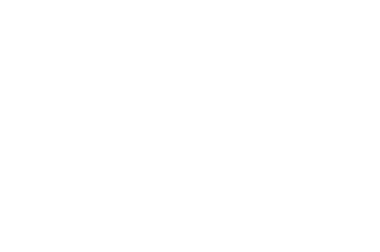

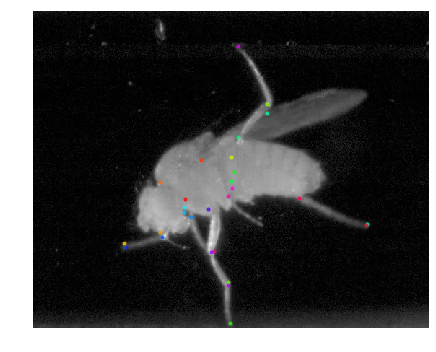

In [7]:
deeplabcut.create_labeled_video(config_path,videofile_path, save_frames =True)

## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [5]:
deeplabcut.create_labeled_video(config_path,videofile_path)

  0%|          | 27/6022 [00:00<00:22, 263.30it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4 and data.
6022
Duration of video [s]:  240.88 , recorded with  25.0 fps!
Overall # of frames:  6022 with cropped frame dimensions:  550 440
Generating frames and creating video.


  0%|          | 24/12320 [00:00<00:51, 238.54it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4 and data.
12320
Duration of video [s]:  492.8 , recorded with  25.0 fps!
Overall # of frames:  12320 with cropped frame dimensions:  550 440
Generating frames and creating video.


  0%|          | 25/7110 [00:00<00:29, 241.04it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4 and data.
7110
Duration of video [s]:  284.4 , recorded with  25.0 fps!
Overall # of frames:  7110 with cropped frame dimensions:  550 440
Generating frames and creating video.


  0%|          | 25/5775 [00:00<00:23, 249.71it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4 and data.
5775
Duration of video [s]:  231.0 , recorded with  25.0 fps!
Overall # of frames:  5775 with cropped frame dimensions:  550 440
Generating frames and creating video.


  1%|          | 24/4610 [00:00<00:19, 238.94it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4 and data.
4610
Duration of video [s]:  184.4 , recorded with  25.0 fps!
Overall # of frames:  4610 with cropped frame dimensions:  550 440
Generating frames and creating video.


  1%|▏         | 24/1829 [00:00<00:07, 238.72it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4 and data.
1829
Duration of video [s]:  73.16 , recorded with  25.0 fps!
Overall # of frames:  1829 with cropped frame dimensions:  550 440
Generating frames and creating video.


  1%|          | 24/3418 [00:00<00:14, 238.42it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4 and data.
3418
Duration of video [s]:  136.72 , recorded with  25.0 fps!
Overall # of frames:  3418 with cropped frame dimensions:  550 440
Generating frames and creating video.


  1%|          | 24/2616 [00:00<00:10, 236.93it/s]

Starting %  /data/LiftFly3D/prism/bottom_view/videos ['/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly1_004_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_001_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_002_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_003_prism.mp4', '/data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4']
Loading  /data/LiftFly3D/prism/bottom_view/videos/video_191125_PR_Fly2_004_prism.mp4 and data.
2616
Duration of video [s]:  104.64 , recorded with  25.0 fps!
Overall # of frames:  2616 with cropped frame dimensions:  550 440
Generating frames and creating video.


100%|██████████| 2616/2616 [00:09<00:00, 271.83it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
%matplotlib notebook 
deeplabcut.plot_trajectories(path_config_file,videofile_path)

In [ ]:
sess.close()